# Power Curve Convolution

* Power curves only offer a "suggestion" of what a wind turbine should produce for a given wind speed
* In reality, many stochastics effects are affect this output
* RESkit allows for the creation of a convoluted power curve which takes stochastic responses into account
  - Begins with any general power curve
  - Convolves a guassian distribution with a wind-speed-dependent standard deviation onto the power curve

In [1]:
import reskit as rk

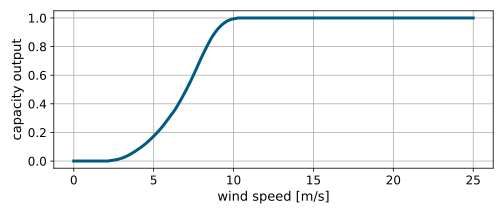

In [2]:
# Power curve from a given capacity (kW) and rotor diameter (m)
pc = rk.wind.PowerCurve.from_capacity_and_rotor_diam(capacity=3000, rotor_diam=140)

pc

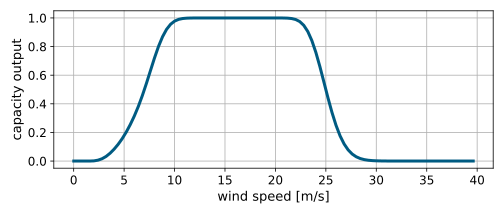

In [3]:
# Power curve from a specific capacity (in W/m2)
#  * As an example, standard deviation should be calculated with: std = ws*0.05 + 0.2

pc2 = pc.convolute_by_gaussian(scaling=0.05, base=0.2)

pc2

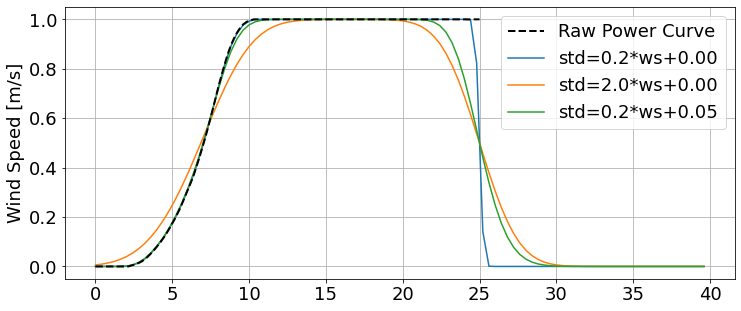

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 5))
plt.rc("font", size=18)

pc = rk.wind.PowerCurve.from_capacity_and_rotor_diam(capacity=3000, rotor_diam=140)

plt.plot(
    pc.wind_speed,
    pc.capacity_factor,
    label="Raw Power Curve",
    zorder=3,
    c="k",
    ls="--",
    lw=2,
)

pc2 = pc.convolute_by_gaussian(scaling=0.00, base=0.2)
plt.plot(pc2.wind_speed, pc2.capacity_factor, label="std=0.2*ws+0.00")

pc3 = pc.convolute_by_gaussian(scaling=0.00, base=2.0)
plt.plot(pc3.wind_speed, pc3.capacity_factor, label="std=2.0*ws+0.00")

pc4 = pc.convolute_by_gaussian(scaling=0.05, base=0.2)
plt.plot(pc4.wind_speed, pc4.capacity_factor, label="std=0.2*ws+0.05")

plt.legend()
plt.grid()
plt.ylabel("Capacity Factor")
plt.ylabel("Wind Speed [m/s]")

plt.show()